# __Python and R in one Notebook (IPython magic Integration)__

## Tutorial on how to use rpy2 library to combine Python and R in a Jupyter notebook

In [1]:
# More information avaialble here: http://rpy.sourceforge.net/rpy2/doc-2.4/html/interactive.html

# Load the Ipython magic integration
%load_ext rpy2.ipython

import warnings
import numpy as np

In [2]:
# Suppress all warning messages (Importing R functions creates a lot of warnings)
warnings.filterwarnings('ignore')

In [3]:
# Import R functions

# Format: %R Require(<function>)

%R require(hist)
%R require(boxplot)
%R require(stem)

array([0], dtype=int32)

### Writing Python code

In [4]:
a = np.array([1, 2, 3, 4, 5])
a

array([1, 2, 3, 4, 5])

### Writing R code

In [5]:
%%R

# Format: '%%R' added at the beginning of the cell will allow the entire cell to run R code
# '%%R' must be the first line of the cell or else you will get a syntax error

b <- c(6, 7, 8, 9, 10)
b

[1]  6  7  8  9 10


### Write 1 Line of R Code

In [6]:
# Format '%R' will only execute one line of R code
# '%R' does not need to be the very first line.
# R output gets converted back into Python

%R c <- c(1, 3, 5, 7, 9)
%R mean(c)

array([ 5.])

### Converting R code into Python

In [7]:
# Since the R output gets converted back into Python, you can assign it to a variable in Python

d = %R c
d

array([ 1.,  3.,  5.,  7.,  9.])

In [8]:
# You can also assign it through this format:
%R -o c
c

array([ 1.,  3.,  5.,  7.,  9.])

### Converting Python code into R

In [9]:
# Similarly, Python code can be coverted into R through this format:
%R -i a

# Since only the one line is R code, the output is still shown in Python
%R a

array([1, 2, 3, 4, 5], dtype=int32)

In [10]:
%%R

# If you convert the whole cell into R, the output will be shown properly

a

[1] 1 2 3 4 5


### Making graphics in R

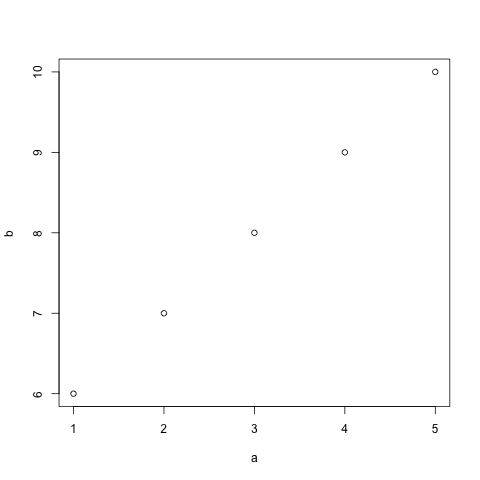

In [11]:
# Graphics can drawn by using '%R' or '%%R'
%R plot(a, b)

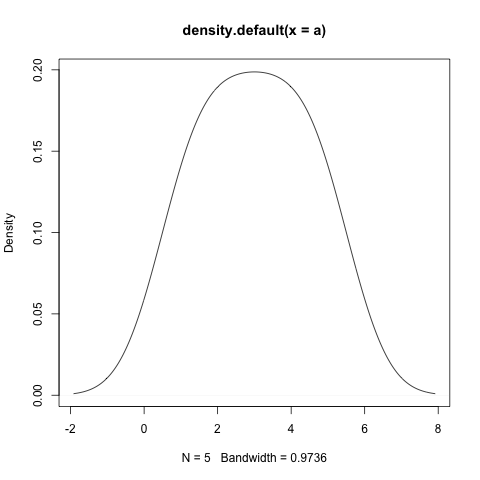

In [12]:
%%R
plot(density(a))

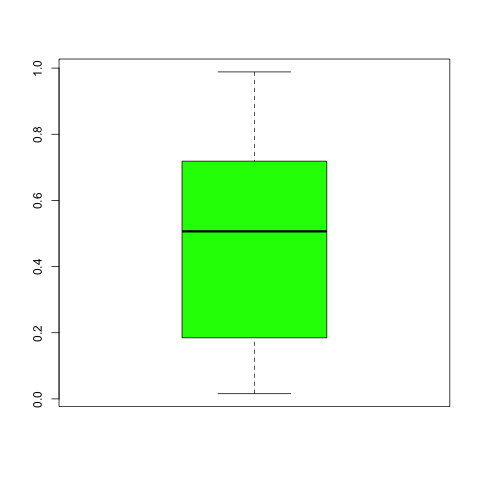

In [13]:
# Create an array with 100 random numbers from 0 - 1 in Python, then assign it to R and draw a boxplot of it.

e = np.random.rand(100)
%R -i e boxplot(e, col='green') -n

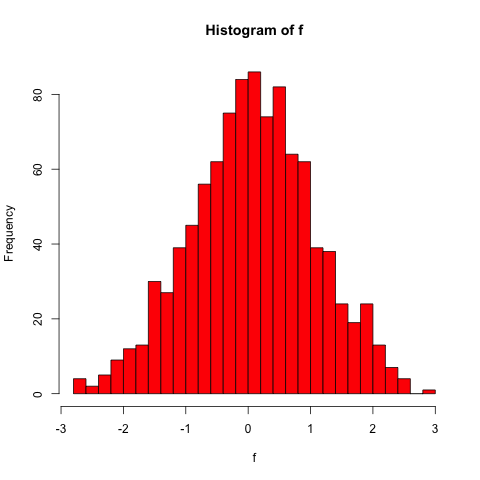

In [14]:
# Create array of size 1000 with normal distrubtion. Send array into R and make a histogram from it

f = np.random.normal(size=1000)
%R -i f hist(f, col='red', breaks=25) -n